<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/pytorch1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import torch
from torch import nn ## it contains all of torch's building blocks
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
print(torch.__version__)

1.12.1+cu113


### 1.Data:- Preparing and Loading

` Data can be of any form :-`
1. `images`
2. `voice/audio`
3. `vidoes`
4. `text`
  

In [189]:
weight = 0.9
bias = 0.5
start = 0.0
end = 1.0
step  =  0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

In [190]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

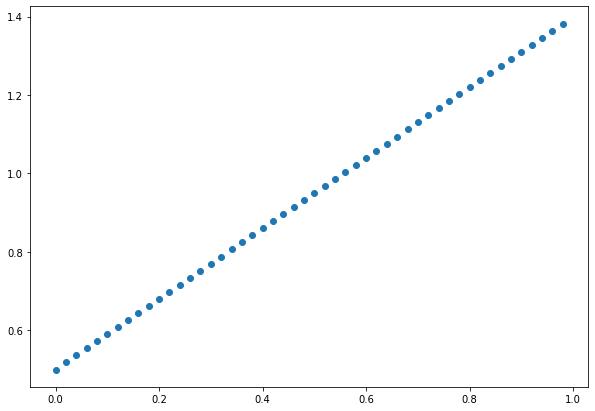

In [191]:
plt.figure(figsize =(10,7))
plt.scatter(X,y)

plt.show()

## 2.Initializing the model

In [192]:
# Creating a sub-class of nn.Module and defining the parameters i.e, weights and biases along with that we overwright the forward function.

class LinearRegressionModel(nn.Module):
  
  def __init__(self):
    super().__init__()
    # Linear_transformation, fully_connected_layer,probing_layer,dense_layer
    self.linear_layer = nn.Linear(in_features = 1,out_features=1)
  
  def forward(self,x:torch.Tensor) -> torch.Tensor: 
    return self.linear_layer(x)

In [193]:
# create a random Seed
torch.manual_seed(42)

# create an instance of the sub-class we created
model_0 = LinearRegressionModel()

# Checking the Parameter
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [194]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [195]:
#setting a loss function
loss_fn = torch.nn.L1Loss()

# setting up an optimizer
optimizer = torch.optim.SGD(params=list(model_0.parameters()), lr = 0.02)

## 3.Creating a training loop

In [196]:
train_loss_values = []
test_loss_values = []
epoch_count = []
epochs = 100
for epoch in range(epochs):
  # Training of the model
  model_0.train()
  y_pred = model_0(X_train) # forward
  loss = loss_fn(y_pred,y_train) # setting the loss function
  optimizer.zero_grad() # setting optimizer to zero grad i.e, 
  loss.backward() # backward propagation
  optimizer.step() # perfoming the optimization step
  
  # testing out our model
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test) # forward propagation
    test_loss = loss_fn(test_pred,y_test)
    if epoch%10 == 0:
      test_loss_values.append(test_loss)
      train_loss_values.append(loss)
      epoch_count.append(epoch)
      print(f"Epoch: {epoch} | loss: {loss} | Test_loss: {test_loss}" )

Epoch: 0 | loss: 0.2669505774974823 | Test_loss: 0.2248823195695877
Epoch: 10 | loss: 0.0657433271408081 | Test_loss: 0.042829710990190506
Epoch: 20 | loss: 0.049910955131053925 | Test_loss: 0.034173011779785156
Epoch: 30 | loss: 0.03874649852514267 | Test_loss: 0.026412392035126686
Epoch: 40 | loss: 0.027586067095398903 | Test_loss: 0.018550222739577293
Epoch: 50 | loss: 0.016415711492300034 | Test_loss: 0.01068810187280178
Epoch: 60 | loss: 0.005261165089905262 | Test_loss: 0.0029451847076416016
Epoch: 70 | loss: 0.002761051757261157 | Test_loss: 0.022247564047574997
Epoch: 80 | loss: 0.002761051757261157 | Test_loss: 0.022247564047574997
Epoch: 90 | loss: 0.002761051757261157 | Test_loss: 0.022247564047574997


In [197]:
list(model_0.parameters())

[Parameter containing:
 tensor([[0.8962]], requires_grad=True), Parameter containing:
 tensor([0.4990], requires_grad=True)]

In [198]:
with torch.inference_mode():
  prediction = model_0(X_test)

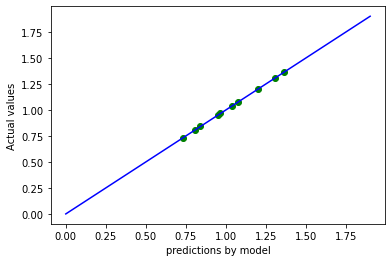

In [199]:
a = torch.arange(0,2,0.1)
plt.scatter(prediction,y_test,c='g')
plt.plot(a,a,c ='b')
plt.xlabel('predictions by model')
plt.ylabel('Actual values')
plt.show()

In [200]:
train_loss_values, test_loss_values, epoch_count

([tensor(0.2670, grad_fn=<L1LossBackward0>),
  tensor(0.0657, grad_fn=<L1LossBackward0>),
  tensor(0.0499, grad_fn=<L1LossBackward0>),
  tensor(0.0387, grad_fn=<L1LossBackward0>),
  tensor(0.0276, grad_fn=<L1LossBackward0>),
  tensor(0.0164, grad_fn=<L1LossBackward0>),
  tensor(0.0053, grad_fn=<L1LossBackward0>),
  tensor(0.0028, grad_fn=<L1LossBackward0>),
  tensor(0.0028, grad_fn=<L1LossBackward0>),
  tensor(0.0028, grad_fn=<L1LossBackward0>)],
 [tensor(0.2249),
  tensor(0.0428),
  tensor(0.0342),
  tensor(0.0264),
  tensor(0.0186),
  tensor(0.0107),
  tensor(0.0029),
  tensor(0.0222),
  tensor(0.0222),
  tensor(0.0222)],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [201]:
training_loss = torch.tensor(train_loss_values).numpy()
testing_loss = torch.tensor(test_loss_values).numpy()

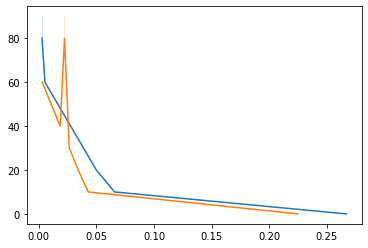

In [202]:
import seaborn as sns
sns.lineplot(x = training_loss,y = epoch_count)
sns.lineplot(x = testing_loss,y = epoch_count)

## 4.Saving and Loading the data
### `torch.save() is used to save a model in pickle format`
### `torch.load() is used to load a model in pickle format`
### `torch.nn.Module.load_state_dict() is used to load models state_dict`

In [203]:
import pickle
from pathlib import Path
PATH_NAME = Path('Models')
PATH_NAME.mkdir(parents = True,exist_ok = True)
MODEL_NAME = '01_Model_pytorch.pth'
MODEL_SAVE_PATH = PATH_NAME / MODEL_NAME
torch.save(model_0.state_dict(),f = MODEL_SAVE_PATH)
print(MODEL_SAVE_PATH)

Models/01_Model_pytorch.pth


In [204]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8962]])),
             ('linear_layer.bias', tensor([0.4990]))])

In [205]:
loaded_model_preds = loaded_model(X_test)
prediction == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [206]:
model = LinearRegressionModel()
print(f'Old Parameters of the model: {model.state_dict()} ')
model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

Old Parameters of the model: OrderedDict([('linear_layer.weight', tensor([[-0.2191]])), ('linear_layer.bias', tensor([0.2018]))]) 


<All keys matched successfully>

In [207]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8962]])),
             ('linear_layer.bias', tensor([0.4990]))])

In [208]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
torch.__version__

'1.12.1+cu113'

In [209]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [210]:
print(device)

cuda


In [211]:
class linear_reg(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  
  def forward(self,x:torch.Tensor) -> torch.Tensor:
     return x*self.weights +self.bias

In [212]:
torch.manual_seed(42)
a = linear_reg()
a.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [213]:
a.to(device)

linear_reg()

In [214]:
next(a.parameters()).device

device(type='cuda', index=0)

In [215]:
loss_1 = nn.L1Loss()
optimizer = torch.optim.SGD(params = a.parameters(),lr = 0.01)

In [216]:
torch.manual_seed(42)
epochs = 200

## putting data on gpu
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  a.train()
  y_pred = a(X_train)
  loss = loss_1(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  a.eval()
  with torch.inference_mode():
    predictions = a(X_test)
    loss = loss_1(predictions,y_test)
  if epoch%20 ==0:
      print({loss})

{tensor(0.6897, device='cuda:0')}
{tensor(0.4349, device='cuda:0')}
{tensor(0.1848, device='cuda:0')}
{tensor(0.0709, device='cuda:0')}
{tensor(0.0481, device='cuda:0')}
{tensor(0.0393, device='cuda:0')}
{tensor(0.0305, device='cuda:0')}
{tensor(0.0217, device='cuda:0')}
{tensor(0.0131, device='cuda:0')}
{tensor(0.0051, device='cuda:0')}


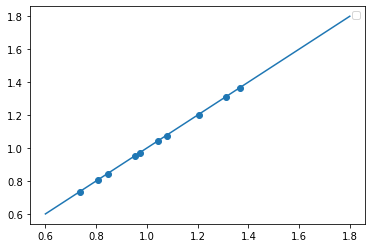

In [217]:
predictions=predictions.cpu()
y_test=y_test.cpu()
line = torch.arange(0.6,2,0.3)
line= line.cpu()

plt.scatter(predictions,y_test)
plt.plot(line,line)
plt.legend()
plt.show()

In [218]:
a.state_dict()

OrderedDict([('weights', tensor([0.9011], device='cuda:0')),
             ('bias', tensor([0.5028], device='cuda:0'))])